In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [17]:
img1 = cv2.imread('1.png')
img2 = cv2.imread('2.png')

Compute homography matrix H, mapping src_pts to dst_pts.src_pts and dst_pts are Nx2 arrays of corresponding points.

In [18]:
def homography(src_pts, dst_pts):
    A = []
    for (x, y), (x_p, y_p) in zip(src_pts, dst_pts):
        A.append([-x, -y, -1, 0, 0, 0, x*x_p, y*x_p, x_p])
        A.append([0, 0, 0, -x, -y, -1, x*y_p, y*y_p, y_p])

    A = np.array(A)

    U, S, Vh = np.linalg.svd(A)
    h = Vh[-1, :]
    H = h.reshape(3,3)
    return H / H[2,2]

Apply Homography

In [19]:
def apply_homography(img, H, output_shape):
    h_out, w_out = output_shape
    H_inv = np.linalg.inv(H)

    output_img = np.zeros_like(img)

    for y_out in range(h_out):
        for x_out in range(w_out):
            p_out = np.array([x_out, y_out, 1])
            p_in = H_inv @ p_out
            p_in /= p_in[2]
            x_in, y_in = p_in[:2]

            x_in_i = int(round(x_in))
            y_in_i = int(round(y_in))

            if 0 <= x_in_i < img.shape[1] and 0 <= y_in_i < img.shape[0]:
                output_img[y_out, x_out] = img[y_in_i, x_in_i]
    return output_img

In [20]:
src_points = np.array([
    [20, 15],
    [700, 180],
    [680, 550],
    [290, 580]
])

dst_points = np.array([
    [0, 0],
    [400, 0],
    [400, 600],
    [0, 600]
])

In [21]:
H = homography(src_points, dst_points)
corrected_img1 = apply_homography(img1, H, (600, 400))
corrected_img2 = apply_homography(img2, H, (600, 400))

Output

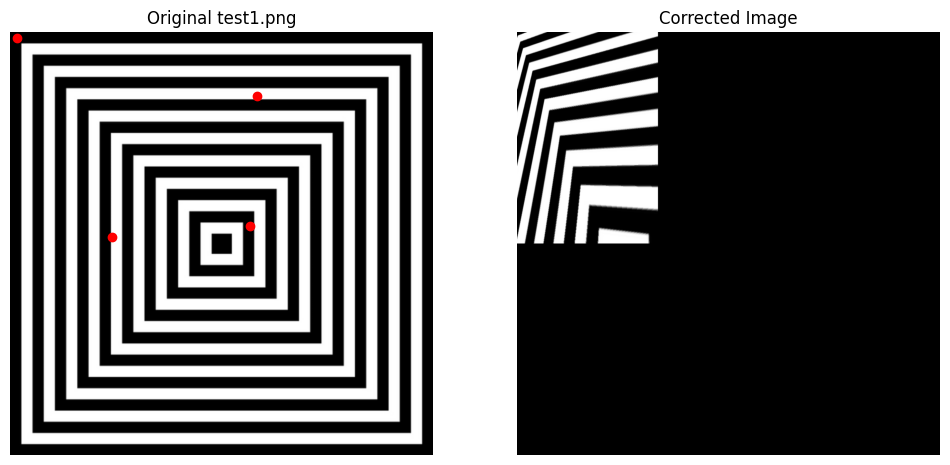

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Original test1.png')
plt.imshow(img1)
plt.scatter(src_points[:,0], src_points[:,1], color='red', marker='o')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Corrected Image')
plt.imshow(corrected_img1)
plt.axis('off')

plt.show()

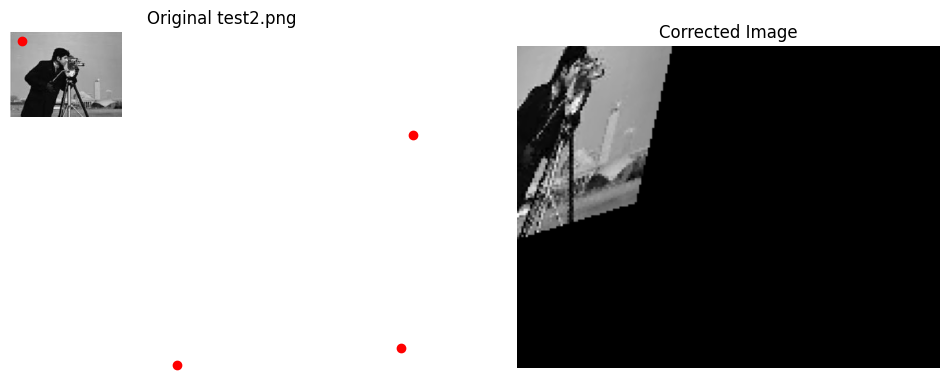

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Original test2.png')
plt.imshow(img2)
plt.scatter(src_points[:,0], src_points[:,1], color='red', marker='o')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Corrected Image')
plt.imshow(corrected_img2)
plt.axis('off')

plt.show()